# Yelp Review: Exploratory Data Analysis

### In this notebook we explore the full Yelp review data with exploratory data analysis.
### Some code cells only run on the first 20 rows of review data for eaier code error check.
### If you wish to generate complete result, please follow the instructions stated in code cells.

In [4]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Download data from here https://drive.google.com/file/d/17uPXOVdgIPFMGH8uScdK6qclE0sby7Ks/view?usp=sharing
# Change data filepath accordingly
df = pd.read_csv("/home/q/qshichao/BT4222/Archive/yelp_review.csv")

df['date']= pd.to_datetime(df['date'],format='%Y-%m-%d')
df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df['day']= df['date'].dt.day
df.head()

review_id                 user_id             business_id  \
0  vkVSCC7xljjrAI4UGfnKEQ  bv2nCi5Qv5vroFiqKGopiw  AEx2SYEUJmTxVVB18LlCwA   
1  n6QzIUObkYshz4dz2QRJTw  bv2nCi5Qv5vroFiqKGopiw  VR6GpWIda3SfvPC-lg9H3w   
2  MV3CcKScW05u5LVfF6ok0g  bv2nCi5Qv5vroFiqKGopiw  CKC0-MOWMqoeWf6s-szl8g   
3  IXvOzsEMYtiJI0CARmj77Q  bv2nCi5Qv5vroFiqKGopiw  ACFtxLv8pGrrxMm6EgjreA   
4  L_9BTb55X0GDtThi6GlZ6w  bv2nCi5Qv5vroFiqKGopiw  s2I_Ni76bjJNK9yG60iD-Q   

   stars       date                                               text  \
0      5 2016-05-28  Super simple place but amazing nonetheless. It...   
1      5 2016-05-28  Small unassuming place that changes their menu...   
2      5 2016-05-28  Lester's is located in a beautiful neighborhoo...   
3      4 2016-05-28  Love coming here. Yes the place always needs t...   
4      4 2016-05-28  Had their chocolate almond croissant and it wa...   

   useful  funny  cool  year  month  day  
0       0      0     0  2016      5   28  
1       0      0     0  2016      5   28  
2       0      0     0  2016      5   28  
3       0      0     0  2016      5   28  
4       0      0     0  2016      5   28

# 1. Plot review count over year

<AxesSubplot:xlabel='year'>

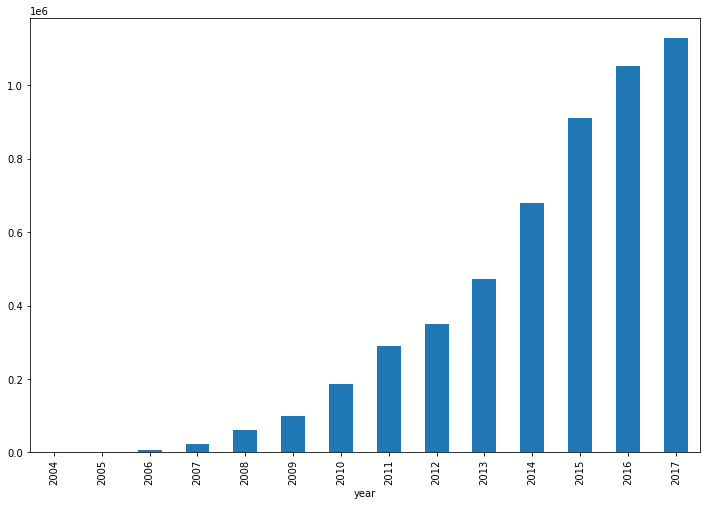

In [6]:
plt.figure(figsize=(12,8))
df.groupby(['year']).size().plot(kind = 'bar')

# 2. Plot review count by business star count

/home/q/qshichao/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



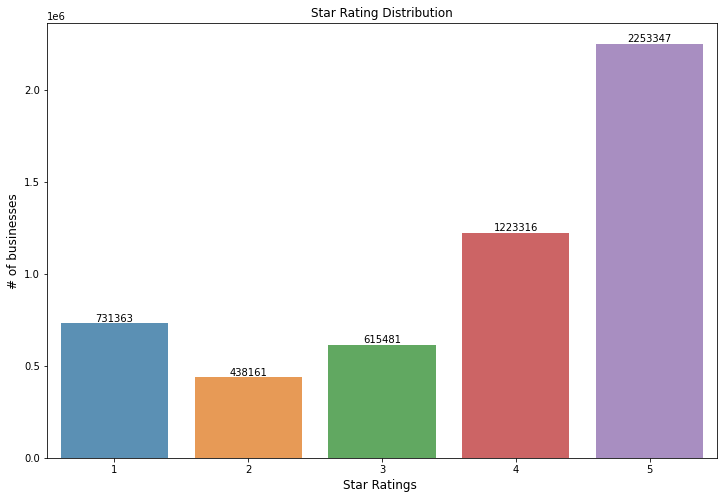

In [7]:
#Get the distribution of the ratings
x=df['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(12,8))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

# 3. Calculate review sentiment score and plot score distribution

In [6]:
# Warning: Running of this cell takes more than 1 hour, for checking of code error, 
# run the next cell, it has the exact same code with only a slice of 20 rows from the data

# import cufflinks as cf
# from textblob import TextBlob

# full_df = df.copy()
# full_df['polarity'] = full_df['cleaned_text'].map(lambda text: TextBlob(text).sentiment.polarity)

# cf.go_offline()
# cf.set_config_file(offline=False, world_readable=True)

# full_df['polarity'].iplot(
#     kind='hist',
#     bins=50,
#     xTitle='polarity',
#     linecolor='black',
#     yTitle='count',
#     title='Sentiment Polarity Distribution')

In [5]:
from textblob import TextBlob
import cufflinks as cf

sample = df.loc[:20]
sample['polarity'] = sample['text'].map(lambda text: TextBlob(text).sentiment.polarity)

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

sample['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

# 4. Find the most frequent words that appear in review text

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Here we only run with 20 rows of data for code error check
# To generate full result, remove [:20] in the below line of code
common_words = get_top_n_words(df['text'][:20], 20)

df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review')

# 5. Find the top part-of-speech tagging for review text

In [9]:
blob = TextBlob(str(df['text']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])

# Here we only run with 20 rows of data for code error check
# To generate full result, remove [:20] in the below line of code
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
title='Top 20 Part-of-speech tagging for review corpus')

# 6. Plot average number of useful, funny and cool votes over year

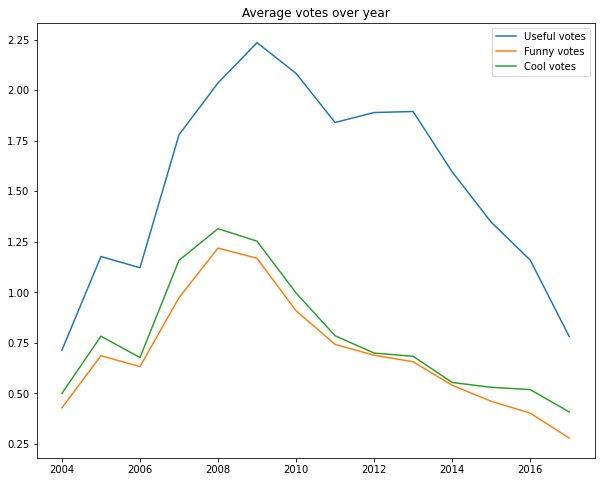

In [9]:
fig = plt.figure(figsize=(10,8))
plt.plot(df.groupby('year')['useful'].sum().index,df.groupby('year')['useful'].sum().values/np.flip(df['year'].value_counts().values),label='Useful votes')
plt.plot(df.groupby('year')['funny'].sum().index,df.groupby('year')['funny'].sum().values/np.flip(df['year'].value_counts().values),label='Funny votes')
plt.plot(df.groupby('year')['cool'].sum().index,df.groupby('year')['cool'].sum().values/np.flip(df['year'].value_counts().values),label='Cool votes')
plt.title('Average votes over year')
plt.legend()
plt.show()

# 7. Plot average number of useful, funny and cool votes by star count

In [6]:
star_count = Counter(df['stars'])
test = df.groupby(['stars'])[['useful','funny','cool']].sum()
test.reset_index(inplace=True)
test.set_index('stars', inplace=True)
test.loc[1]  = test.loc[1] / star_count[1]
test.loc[2]  = test.loc[2] / star_count[2]
test.loc[3]  = test.loc[3] / star_count[3]
test.loc[4]  = test.loc[4] / star_count[4]
test.loc[5]  = test.loc[5] / star_count[5]
test

useful     funny      cool
stars                              
1      2.210875  0.707292  0.279544
2      1.625610  0.668248  0.415523
3      1.341018  0.614906  0.646093
4      1.349785  0.567573  0.824651
5      1.101492  0.353408  0.572854

<AxesSubplot:xlabel='stars'>

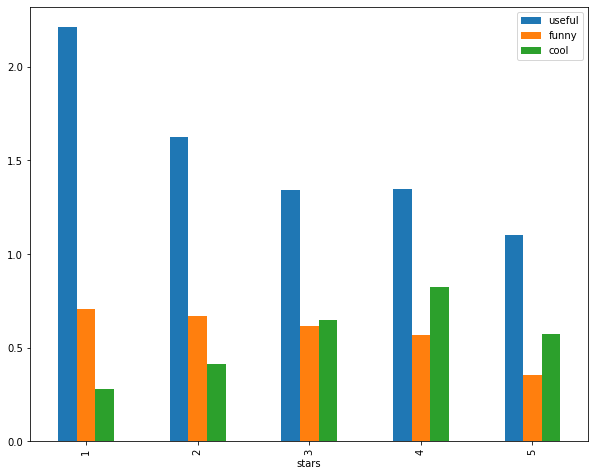

In [7]:
test.groupby(['stars'])[['useful','funny','cool']].sum().plot(kind = 'bar',figsize=(10,8))

# 8. Find the most common topics discussed in reviews

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from collections import Counter

reindexed_data = df['text'][:20]
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', use_idf=True, smooth_idf=True)
reindexed_data = reindexed_data.values
document_term_matrix = tfidf_vectorizer.fit_transform(reindexed_data)
n_topics = 6
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(document_term_matrix)

## Function to return an integer list of predicted topic categories for the topic matrix
def get_keys(topic_matrix):
    keys = topic_matrix.argmax(axis = 1).tolist()
    return keys

## Function to return a tuple of topic categories 
def keys_to_counts(keys):
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)
    
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

## Function to return a list of n topics
def get_top_n_words(n, keys, document_term_matrix, tfidf_vectorizer):
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = tfidf_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

# Printing the most common topics 
top_n_words_lsa = get_top_n_words(3, lsa_keys, document_term_matrix, tfidf_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  place definitely little
Topic 2:  chicken vietnamese pho
Topic 3:  meat smoked lester
Topic 4:  coffee light bf
Topic 5:  burger fries order
Topic 6:  fun voucher friendly


# 9. Find the users who left the most number of reviews in the past 13 years

In [15]:
user_agg=df.groupby('user_id').agg({'review_id':['count'],
                                           'date':['min','max'],
                                           'useful':['sum'],
                                           'funny':['sum'],
                                           'cool':['sum'],
                                           'stars':['mean']})
                                           
user_agg=user_agg.sort_values([('review_id','count')],ascending=False)
print("          Top 10 Users in Yelp")
user_agg.head(10)

          Top 10 Users in Yelp


review_id       date            useful  funny   cool  \
                           count        min        max    sum    sum    sum   
user_id                                                                       
CxDOIDnH8gp9KXzpBHJYXw      3569 2009-11-09 2017-12-05  11345   5546   6695   
bLbSNkLggFnqwNNzzq-Ijw      2077 2012-05-20 2017-12-11  23572  12630  16303   
PKEzKWv_FktMm2mGPjwd0Q      1611 2008-12-12 2017-12-05  12078   4987   8183   
DK57YibC5ShBmqQl97CKog      1463 2006-02-12 2017-12-10  13175   6693  10795   
QJI9OSEn6ujRCtrX06vs1w      1322 2007-03-20 2016-05-01   8748   4104   6142   
d_TBs6J3twMy9GChqUEXkg      1184 2010-12-27 2017-11-23   2992   1341   1792   
ELcQDlf69kb-ihJfxZyL0A      1159 2011-04-10 2017-12-10   2155   1298   1029   
cMEtAiW60I5wE_vLfTxoJQ      1126 2009-06-12 2017-12-07   1943   1213   1509   
hWDybu_KvYLSdEFzGrniTw      1117 2009-03-08 2017-11-26   7234   4968   5762   
U4INQZOPSUaj8hMjLlZ3KA      1101 2008-05-13 2017-12-11   6116   2832   4187   

                           stars  
                            mean  
user_id                           
CxDOIDnH8gp9KXzpBHJYXw  3.201737  
bLbSNkLggFnqwNNzzq-Ijw  3.256139  
PKEzKWv_FktMm2mGPjwd0Q  3.664804  
DK57YibC5ShBmqQl97CKog  3.826384  
QJI9OSEn6ujRCtrX06vs1w  3.622542  
d_TBs6J3twMy9GChqUEXkg  3.463682  
ELcQDlf69kb-ihJfxZyL0A  2.993097  
cMEtAiW60I5wE_vLfTxoJQ  4.066607  
hWDybu_KvYLSdEFzGrniTw  3.640107  
U4INQZOPSUaj8hMjLlZ3KA  3.714805

# 10. Fine the most frequent words to appear in useful and unuseful reviews 

In [16]:
# Here we create a new column named 'useful_bin' in the dataset 
# Those reviews with 0 useful votes are regarded as unuseful, and will have a value 0 in column 'useful_bin'
# Those reviews with more than 0 useful votes are regarded as useful, and will have a value 1 in column 'useful_bin'

def label_race(row,column):
   if row[column] == 0 :
      return 0
   if row[column] > 0 :
      return 1

df['useful_bin'] = df.apply (lambda row: label_race(row,'useful'), axis=1)
useful_reviews = df[df['useful_bin'] == 1]
unuseful_reviews = df[df['useful_bin'] == 0]

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(useful_reviews['text'], 20)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 Words in Useful Reviews')

In [21]:
common_words = get_top_n_words(unuseful_reviews['text'], 20)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df2.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in Unuseful Reviews')